## ML Modelling Notebook


In [62]:
import pandas as pd
import numpy as np
import seaborn as sns

In [63]:
# Load all datasets for training and testing
X_train = pd.read_csv('../datasets/cleaned_datasets/X_train.csv')
X_test = pd.read_csv('../datasets/cleaned_datasets/X_test.csv')
y_train = pd.read_csv('../datasets/cleaned_datasets/y_train.csv')
y_test = pd.read_csv('../datasets/cleaned_datasets/y_test.csv')

In [64]:
# Quick shape check 

print(f'Training Set Shape: X: {X_train.shape}, y: {y_train.shape}')
print(f'Test Set Shape: X: {X_test.shape}, y: {y_test.shape}')
print(len(X_train) + len(X_test))

Training Set Shape: X: (878, 23), y: (878, 1)
Test Set Shape: X: (220, 23), y: (220, 1)
1098


In [65]:
X_train

,PassengerId,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_tmp,Embarked_C,Embarked_Q,Embarked_S,...,Titles_Mrs,Family_Size_0,Family_Size_1,Family_Size_10,Family_Size_2,Family_Size_3,Family_Size_4,Family_Size_5,Family_Size_6,Family_Size_7
0,6,0.341772,0.016510,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,14,0.481013,0.061045,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,839,0.392405,0.110272,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
3,367,0.746835,0.146878,1,0,0,1,1,0,0,...,1,0,1,0,0,0,0,0,0,0
4,665,0.240506,0.015469,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
873,765,0.189873,0.015176,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
874,181,0.430380,0.135753,0,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,0,0
875,368,0.341772,0.014110,0,0,1,1,1,0,0,...,1,1,0,0,0,0,0,0,0,0
876,646,0.594937,0.149765,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0


### Removing Family Size and Embark Variables based on Random Forest Feature Importance Results

In [66]:
X_train.columns

Index(['PassengerId', 'Age', 'Fare', 'Pclass_1', 'Pclass_2', 'Pclass_3',
       'Sex_tmp', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Titles_Master',
       'Titles_Miss', 'Titles_Mr', 'Titles_Mrs', 'Family_Size_0',
       'Family_Size_1', 'Family_Size_10', 'Family_Size_2', 'Family_Size_3',
       'Family_Size_4', 'Family_Size_5', 'Family_Size_6', 'Family_Size_7'],
      dtype='object')

In [67]:
column_ranges = ['Age','Fare','Pclass_1','Pclass_2','Pclass_3','Sex_tmp','Titles_Master','Titles_Miss', 'Titles_Mr', 'Titles_Mrs',]
X_train.loc[:, column_ranges]

,Age,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_tmp,Titles_Master,Titles_Miss,Titles_Mr,Titles_Mrs
0,0.341772,0.016510,0,0,1,0,0,0,1,0
1,0.481013,0.061045,0,0,1,0,0,0,1,0
2,0.392405,0.110272,0,0,1,0,0,0,1,0
3,0.746835,0.146878,1,0,0,1,0,0,0,1
4,0.240506,0.015469,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...
873,0.189873,0.015176,0,0,1,0,0,0,1,0
874,0.430380,0.135753,0,0,1,1,0,1,0,0
875,0.341772,0.014110,0,0,1,1,0,0,0,1
876,0.594937,0.149765,1,0,0,0,0,0,1,0


In [68]:
# Select columns to input to model, and convert Dataframesto np vectors
# column_ranges = np.r_[0:7, 11:13]

column_ranges = ['Age','Fare','Pclass_1','Pclass_2','Pclass_3','Sex_tmp','Titles_Master','Titles_Miss', 'Titles_Mr', 'Titles_Mrs',]
# print(f'X_train Cols: {X_train.columns} , \n X_test Cols: {X_test.columns}')

# Convert Pandas Dataframes to Numpy Vectors
Xtrain = X_train.loc[:, column_ranges].values
ytrain = y_train.iloc[:,0].values
Xtest =  X_test.loc[:, column_ranges].values
ytest = y_test.iloc[:,0].values
print(Xtrain)

[[0.34177215 0.0165095  0.         ... 0.         1.         0.        ]
 [0.48101266 0.06104473 0.         ... 0.         1.         0.        ]
 [0.39240506 0.11027246 0.         ... 0.         1.         0.        ]
 ...
 [0.34177215 0.01411046 0.         ... 0.         0.         1.        ]
 [0.59493671 0.14976542 1.         ... 0.         1.         0.        ]
 [0.5443038  0.01546857 0.         ... 0.         1.         0.        ]]


## Models to implement
1) Logistic Regression
2) Support Vector Machines
3) Ensamble Methods

Goal: Predict if an individual Survived or not to Titanic tragedy based on Features inputs

## Logistic Regresion Model

In [69]:
# Create a Dict to save predictions
predictions = {}

In [70]:
# ML Libraries required
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [71]:
# Model Training
# Define the parameter grid
param_grid = {
    'C': np.logspace(-10, 10, 50),  # Regularization parameter
    'penalty': ['l2','l1'],      # Norm used in the penalization
    'solver': ['liblinear']       # Solver that supports both l1 and l2 penalties
}

lr = LogisticRegression(random_state = 42)
# Set up the GridSearchCV
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(Xtrain, ytrain)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Evaluate on the test set with the best found parameters
best_model = grid_search.best_estimator_
test_score = best_model.score(Xtest, ytest)
print(f"Test set score: {test_score}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'C': 1.5998587196060574, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.7551363636363636
Test set score: 0.8272727272727273


[Text(0, 0.5, 'Dead'), Text(0, 1.5, 'Survived')]

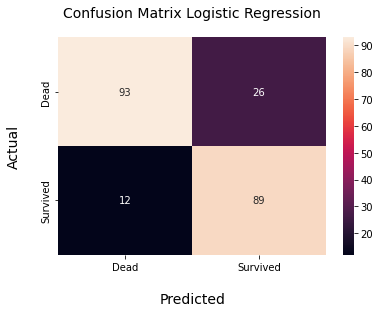

In [72]:
ypred = best_model.predict(Xtest)
conf_matrix = confusion_matrix(ytest, ypred)

# Visualize Confusion Matrix with Seaborn HeatMap
hm = sns.heatmap(conf_matrix, annot=True, fmt='d')
# set plot title
hm.set_title("Confusion Matrix Logistic Regression", fontsize=14, pad=20)

# set x-axis label and ticks. 
hm.set_xlabel("Predicted", fontsize=14, labelpad=20)
hm.xaxis.set_ticklabels(['Dead', 'Survived'])
 
# set y-axis label and ticks
hm.set_ylabel("Actual", fontsize=14, labelpad=20)
hm.yaxis.set_ticklabels(['Dead', 'Survived']) 

In [73]:
# Save ypred in dictionary
predictions['lr'] = ypred

## Random Forest Classifier Model

In [74]:
from sklearn.ensemble import RandomForestClassifier

In [75]:
# Model Training
# Define the parameter grid
param_grid = {    
    'criterion': ['gini','entropy','log_loss'],
    # 'min_samples_split': [5,10],
    # 'min_samples_leaf': [2,4],
    # 'oob_score': [True, False],
    'bootstrap': [True, False]
}

rf = RandomForestClassifier(random_state = 42, n_jobs=4)
# Set up the GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(Xtrain, ytrain)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Evaluate on the test set with the best found parameters
best_model = grid_search.best_estimator_
test_score = best_model.score(Xtest, ytest)
print(f"Test set score: {test_score}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters: {'bootstrap': True, 'criterion': 'entropy'}
Best cross-validation score: 0.8735649350649352
Test set score: 0.9045454545454545


[Text(0, 0.5, 'Dead'), Text(0, 1.5, 'Survived')]

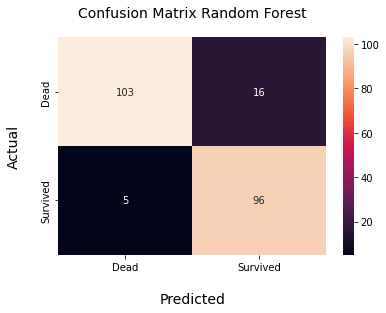

In [76]:
ypred = best_model.predict(Xtest)
conf_matrix = confusion_matrix(ytest, ypred)

# Visualize Confusion Matrix with Seaborn HeatMap
hm = sns.heatmap(conf_matrix, annot=True, fmt='d')
# set plot title
hm.set_title("Confusion Matrix Random Forest", fontsize=14, pad=20)

# set x-axis label and ticks. 
hm.set_xlabel("Predicted", fontsize=14, labelpad=20)
hm.xaxis.set_ticklabels(['Dead', 'Survived'])
 
# set y-axis label and ticks
hm.set_ylabel("Actual", fontsize=14, labelpad=20)
hm.yaxis.set_ticklabels(['Dead', 'Survived']) 

In [77]:
# Save ypred in dictionary
predictions['rf'] = ypred

In [78]:
importances = best_model.feature_importances_
features = X_train.columns
# Print the feature importances
# for feature, importance in zip(features, importances):
#     print(f"{feature}: {importance}")

# Optionally, you can sort the features by importance
sorted_indices = np.argsort(importances)[::-1]
for idx in sorted_indices:
    print(f"{features[idx]}: {importances[idx]}")

Age: 0.38371446556873656
PassengerId: 0.3124526500376555
Embarked_Q: 0.09259036775144658
Pclass_3: 0.06120937262619252
Pclass_2: 0.04771740054190715
Fare: 0.03497500761231729
Embarked_C: 0.028487490895367618
Pclass_1: 0.015577051528203375
Embarked_S: 0.015044817612182992
Sex_tmp: 0.008231375825990409


## Ada Boost Classifier

In [79]:
from sklearn.ensemble import AdaBoostClassifier

In [80]:
# Model Training
# Define the parameter grid
param_grid = {    
    'learning_rate': np.logspace(0.1, 1, 50),
    'algorithm': ['SAMME', 'SAMME.R']
}

ab = AdaBoostClassifier(random_state = 42)
# Set up the GridSearchCV
grid_search = GridSearchCV(ab, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit GridSearchCV to the data
grid_search.fit(Xtrain, ytrain)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best cross-validation score: {best_score}")

# Evaluate on the test set with the best found parameters
best_model = grid_search.best_estimator_
test_score = best_model.score(Xtest, ytest)
print(f"Test set score: {test_score}")


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters: {'algorithm': 'SAMME', 'learning_rate': 1.7657888717633194}
Best cross-validation score: 0.8132012987012989
Test set score: 0.8545454545454545


[Text(0, 0.5, 'Dead'), Text(0, 1.5, 'Survived')]

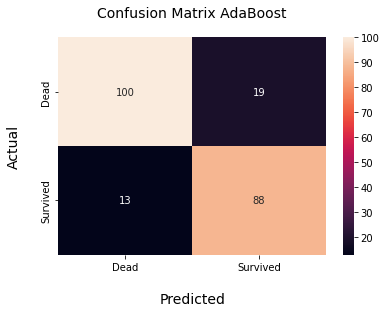

In [81]:
ypred = best_model.predict(Xtest)
conf_matrix = confusion_matrix(ytest, ypred)

# Visualize Confusion Matrix with Seaborn HeatMap
hm = sns.heatmap(conf_matrix, annot=True, fmt='d')
# set plot title
hm.set_title("Confusion Matrix AdaBoost", fontsize=14, pad=20)

# set x-axis label and ticks. 
hm.set_xlabel("Predicted", fontsize=14, labelpad=20)
hm.xaxis.set_ticklabels(['Dead', 'Survived'])
 
# set y-axis label and ticks
hm.set_ylabel("Actual", fontsize=14, labelpad=20)
hm.yaxis.set_ticklabels(['Dead', 'Survived']) 

In [82]:
# Save ypred in dictionary
predictions['ad'] = ypred

array([0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0],
      dtype=int64)

In [89]:
# Select Random Forest Prediction for Kaggle submition as the model was the best performing not only in accuracy, 
# but also managing overfitting
results = pd.DataFrame(data = predictions['rf'], columns=['Survived'])
results = pd.concat([X_test['PassengerId'], results], axis = 1)
results

,PassengerId,Survived
0,77,0
1,273,1
2,96,0
3,208,1
4,86,1
...,...,...
215,843,1
216,890,1
217,721,1
218,760,1


In [90]:
results.to_csv('../submission/rf_pred.csv', index= False)